In [41]:
import os, sys
# import sklearn as skl 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [42]:
business_df = pd.read_excel('NNDR_for_Joe.xlsx',sheet_name=0)
# business_df=business_df.drop(['addr1','addr2','addr3','addr4','postcode','baddr1', 'baddr2',
#        'baddr3', 'baddr4','prop_postcode'],axis=1)
business_df=business_df['']

In [43]:
balance_df = pd.read_excel('NNDR_for_Joe.xlsx',sheet_name=1)
balance_df=balance_df.drop(['account_holder1','account_holder2','name1', 'name2', 'addr1', 'addr2', 'addr3', 'addr4', 'postcode'],axis=1)

In [44]:
address_df = pd.read_excel('NNDR_for_Joe.xlsx',sheet_name=2)
address_df = address_df.drop(['organisation', 'address'],axis=1)

In [12]:
comb_df['empty_prop']=comb_df['empty_prop'].fillna(0)
comb_df['empty_prop']=comb_df['empty_prop'].replace(['Y','V'],1)

In [45]:
balance_df=balance_df[balance_df['fin_year']==201718.0]

### Now merging dataframes: making sure the matching key is the same format in both dataframes

In [46]:
business_df['prop']=business_df['prop'].apply(str)
address_df['nndr_prop_ref']=address_df['nndr_prop_ref'].apply(str)
comb_df = pd.merge(business_df, address_df,  how = 'left', left_on = 'prop', right_on = 'nndr_prop_ref')

In [47]:
business_df.shape, address_df.shape,comb_df.shape

((10823, 9), (13126, 9), (10861, 18))

In [48]:
comb_df = pd.merge(comb_df, balance_df,  how = 'left', left_on = 'acct_id', right_on = 'account_id', suffixes =['','_2'])
print(comb_df.shape)
comb_df.columns

(10886, 30)


Index(['name1', 'name2', 'acct_id', 'ck', 'prop', 'rv', 'vo_propdescrip',
       'empty_prop', 'empty_from', 'UPRN', 'start_date', 'entry_date',
       'last_update_date', 'end_date', 'postcode_master', 'nndr_prop_ref',
       'llpg_usage', 'Ward', 'propref', 'fin_year', 'status', 'account_id',
       'check_digit', 'paymeth_code', 'trans_code', 'bill_no', 'bill_bal',
       'last_payment', 'fullaccountref', 'account_bal'],
      dtype='object')

In [50]:
comb_df = comb_df[['rv','vo_propdescrip','empty_prop', 
                   'llpg_usage', 'Ward', 'paymeth_code','bill_no', 'account_bal', 'bill_bal']]

In [51]:
for item in comb_df.columns:
    print(item,comb_df[item].isnull().sum())

rv 0
vo_propdescrip 0
empty_prop 8991
llpg_usage 535
Ward 535
paymeth_code 9520
bill_no 9520
account_bal 9520
bill_bal 9520


In [10]:
comb_df['vo_propdescrip'].str.upper();

In [13]:
comb_df['bin_label']=comb_df['bill_bal'].apply(lambda x: 1 if float(x)<0 else 0)
comb_df['bin_label'].value_c`ounts()

0    10577
1      309
Name: bin_label, dtype: int64

Make a dictionary to store names of variables with their indices

In [14]:
# combined_df5 merged all uncommon values into a single 'other' var; this is an alternative strategy
comb_df['split_llpg1']=comb_df['llpg_usage'].apply(lambda x: '-'.join(str(x).split(',')[1:2]))
comb_df['split_llpg2']=comb_df['llpg_usage'].apply(lambda x: '-'.join(str(x).split(',')[1:3]))

Now we can do crosstab on the more general version of llpg (ie more limited number of options)

bin_label    0   1      neg_pc
bill_no                       
25.0         1   0  100.000000
24.0         2   0  100.000000
21.0         1   0  100.000000
11.0        13   1   92.857143
1.0        454  48   90.438247


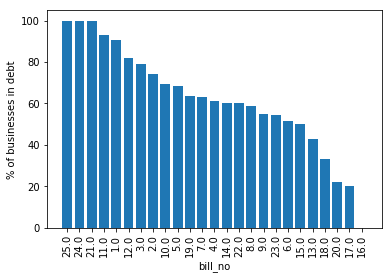

In [16]:
def show_crosstab(feat,df=comb_df,threshold=1):
    counts = df[feat].value_counts()
    repl = counts[counts <= threshold].index
    # list of uncommon values to be created, taken by indexing the value_counts where count is sub-threshold
#     df['edited']=df[feat].replace(repl, 'Other')
    ct = pd.crosstab(df[feat], df['bin_label'])
    ct['neg_pc']=ct[0]/(ct[0]+ct[1])*100
    sorted_df = ct.sort_values('neg_pc',ascending=False)
    print(sorted_df.head())  
    plt.bar(range(len(ct)),(sorted_df['neg_pc']))
    plt.xticks(range(len(ct)),sorted_df.index,rotation=90)
    plt.ylabel('% of businesses in debt')
    plt.xlabel(feat)
show_crosstab('bill_no')

bin_label         0  1      neg_pc
split_llpg1                       
 Utilities      202  0  100.000000
 Animal Centre    1  0  100.000000
 Agricultural     2  0  100.000000
                543  6   98.907104
 Information    174  2   98.863636


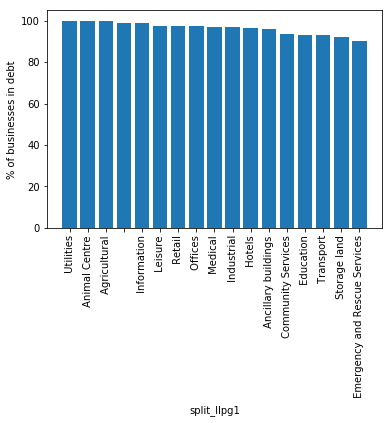

In [17]:
show_crosstab('split_llpg1')

bin_label                                           0  1  neg_pc
split_llpg2                                                     
 Leisure- Sporting activities e.g. leisure centre   5  0   100.0
 Medical- Dentist                                   7  0   100.0
 Retail- Automated Teller Machines (ATMs)          75  0   100.0
 Offices- Broadcasting (TV                          2  0   100.0
 Offices                                           23  0   100.0


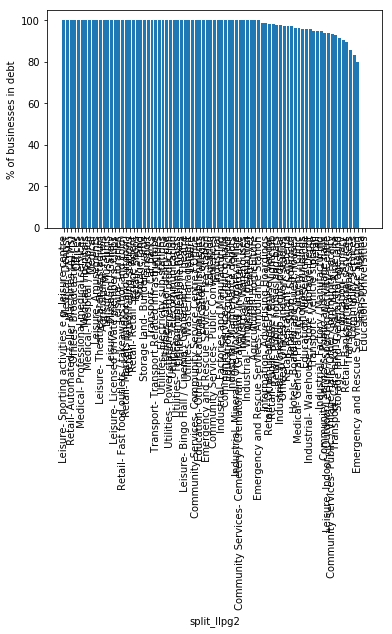

In [18]:
show_crosstab('split_llpg2')

bin_label                      0   1     neg_pc
Ward                                           
SPRINGFIELD                  295   4  98.662207
CAZENOVE                     241   5  97.967480
HACKNEY CENTRAL              418  10  97.663551
LONDON FIELDS                885  22  97.574421
HOXTON EAST AND SHOREDITCH  2549  64  97.550708


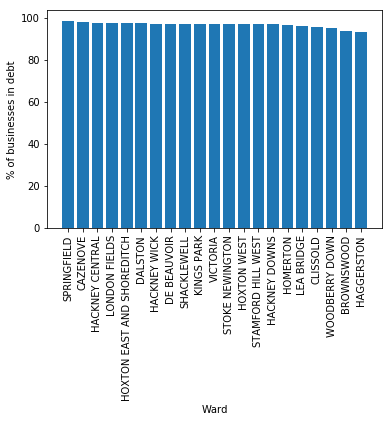

In [19]:
show_crosstab('Ward')

bin_label       0    1      neg_pc
paymeth_code                      
CSHY            1    0  100.000000
DD14            4    0  100.000000
CSQ01           5    1   83.333333
CSM01         922  230   80.034722
DD12            9    3   75.000000


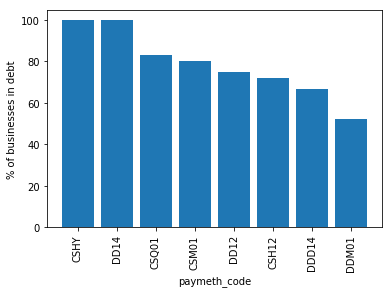

In [20]:
show_crosstab('paymeth_code')

In [23]:
comb_df['paymeth_code'].value_counts()

CSM01    1152
DDM01     109
CSH12      79
DD12       12
CSQ01       6
DD14        4
DDD14       3
CSHY        1
Name: paymeth_code, dtype: int64

In [31]:
# df['hour'] = df.apply(lambda x: find_hour(x['Dates']), axis=1)
def fun(x): 
    'DD' if 'DD' in x else 'CSM'
comb_df['paymeth_code'].apply(fun)

TypeError: fun() got an unexpected keyword argument 'axis'

In [33]:
comb_df.columns

Index(['rv', 'vo_propdescrip', 'empty_prop', 'llpg_usage', 'Ward',
       'paymeth_code', 'bill_no', 'account_bal', 'bill_bal', 'bin_label',
       'split_llpg1', 'split_llpg2'],
      dtype='object')

In [38]:
# combined_df4['bin_label']=combined_df4['account_bal'].apply(lambda x: 1 if float(x)<0 else 0)
comb_df['general_paymeth']=comb_df['paymeth_code'].apply(lambda x: 'DD' if 'DD' in x else 'CSM')
comb_df[['paymeth_code','general_paymeth']]

TypeError: argument of type 'float' is not iterable

In [ ]:
show_crosstab('general_paymeth')

Too many different values for RV (rates value) so need to discretise it

In [ ]:
combined_df4['discrete_rv']=pd.cut(combined_df4['rv'],bins=range(0,2000000,10000),labels=False)
combined_df4[['rv','discrete_rv']]
# print(combined_df4['rv'].max())
# print(combined_df4['rv'].min())
# print(combined_df4['discrete_rv'].max())
# print(combined_df4['discrete_rv'].min())
combined_df4['discrete_rv'].index[combined_df4['rv'].apply(np.isnan)]
# list_of_nans=list((pd.isnull(combined_df4).any(1).nonzero()[0]))
list_of_nans=list((pd.isnull(combined_df4)))
print(list_of_nans)
combined_df4['discrete_rv'].hist(bins=100)
# plt.hist(combined_df4['discrete_rv'])
# print(combined_df4.loc[list_of_nans])#[['rv','discrete_rv']])

In [ ]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y['bin_label'])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. \t {} {} ({:3f})".format(f + 1, feats_dict[indices[f]], ' '*(30-len(feats_dict[indices[f]])),  importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()